<a href="https://colab.research.google.com/github/ekta-ovhal-26/ds_ekta/blob/outputs/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

# --- STEP 1: UPLOAD FILES ---
# Run this once to upload fear_greed_index.csv and historical_data.csv
if not os.path.exists('fear_greed_index.csv') or not os.path.exists('historical_data.csv'):
    print("Please upload the two CSV files:")
    uploaded = files.upload()

# --- STEP 2: LOAD DATA ---
fg = pd.read_csv('fear_greed_index.csv')
hd = pd.read_csv('historical_data.csv')

Please upload the two CSV files:


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [11]:
# --- STEP 3: PREPROCESSING ---
fg['date'] = pd.to_datetime(fg['date'])
hd['Timestamp IST'] = pd.to_datetime(hd['Timestamp IST'], dayfirst=True)
hd['date'] = hd['Timestamp IST'].dt.normalize()

In [14]:
#Aggregate trading metrics by date
daily_trading = hd.groupby('date').agg(
    total_volume_usd=('Size USD', 'sum'),
    total_pnl=('Closed PnL', 'sum'),
    trade_count=('Trade ID', 'count'),
    total_fees=('Fee', 'sum')
).reset_index()

# Merge with Fear & Greed index
df = pd.merge(daily_trading, fg[['date', 'value', 'classification']], on='date', how='inner')

# Create necessary directories for the assignment
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)



/tmp/ipython-input-3460258170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='classification', y='total_volume_usd',


Analysis complete. Files saved in outputs/ and csv_files/


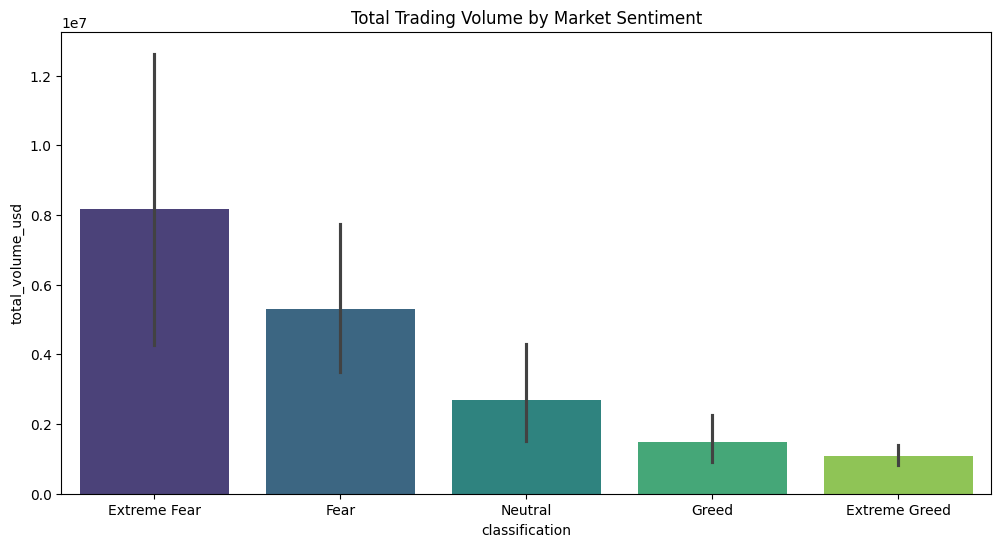

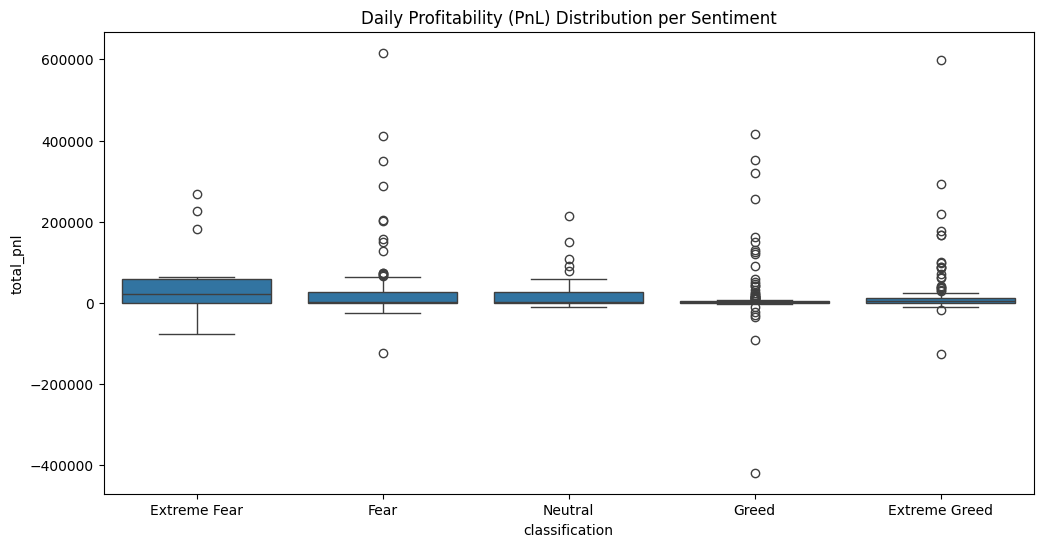

In [16]:
 #--- STEP 4: VISUALIZATION ---
# 1. Volume vs Sentiment
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='classification', y='total_volume_usd',
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette='viridis')
plt.title('Total Trading Volume by Market Sentiment')
plt.savefig('outputs/volume_by_sentiment.png')

# 2. PnL by Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='classification', y='total_pnl',
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Daily Profitability (PnL) Distribution per Sentiment')
plt.savefig('outputs/pnl_distribution.png')

# Save merged data
df.to_csv('csv_files/merged_trading_sentiment.csv', index=False)
print("Analysis complete. Files saved in outputs/ and csv_files/")